In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fl350/.pyenv/versions/2.7.11/envs/jupyter/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import pandas as pd

import seaborn as sns
from latexify import latexify, format_axes

/home/fl350/.pyenv/versions/2.7.11/envs/jupyter/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
data = pd.read_csv('/home/fl350/bachbot/scratch/harm_results.csv', names=['Error Type', 'Predicted Parts', 'Error Rate'])
data

,Error Type,Predicted Parts,Error Rate
0,TER,A,0.558236
1,TER,B,0.758904
2,TER,ATB,0.281959
3,TER,S,0.468421
4,TER,AT,0.313627
5,TER,T,0.764706
6,FER,A,0.558236
7,FER,B,0.758904
8,FER,ATB,0.121774
9,FER,S,0.468421


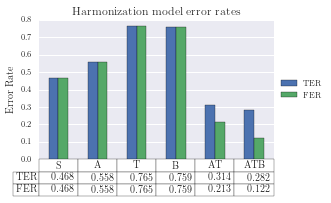

In [10]:
latexify(fig_width=4)

ax = pd.pivot_table(data, values='Error Rate', index=['Predicted Parts'], columns=['Error Type'])\
.round(3)\
[['TER', 'FER']]\
.loc[['S', 'A', 'T', 'B', 'AT', 'ATB']]\
.plot.bar(table=True)
ax.set_title('Harmonization model error rates')
ax.set_ylabel('Error Rate')
ax.get_xaxis().set_visible(False)   # Hide Ticks

#ax.legend(title="", loc='best')
# Shrink current axis by 20%, add legend to left
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(title="", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('harmonization-results.pgf', bbox_inches='tight', dpi=300)
plt.show()